# 图片转字符画

## 实验环境

- Python 3.5
- Pillow 5.1.0 （图像解析）
- Requests 2.12.5 （远程请求图片资源）

## 实验原理

- 每个字符都可以视为一个大块的像素
- 每个字符表示一种灰度色彩
- 使用简化的 `sRGB IEC61966-2.1` 公式将RGB色彩转换为灰度值
  $$ L = 0.2126r + 0.7152g + 0.0722b $$

In [1]:
# 导入必要的库
from PIL import Image
import argparse
# 我们直接从远程服务器打开图片进行转换
from requests import get
from io import BytesIO

In [2]:
# 定义字符映射表
ascii_char = list("$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. ")

In [3]:
def get_char(r: int, g: int, b: int, alpha=256):
    """ 定义转换函数 """
    # 判断 alpha 值
    if alpha == 0:
        return ' '
    # 获取字符集的长度，这里为 70
    length = len(ascii_char)
    # 将 RGB 值转为灰度值 gray，灰度值范围为 0-255
    gray = int(0.2126 * r + 0.7152 * g + 0.0722 * b)
    # 灰度值范围为 0-255，而字符集只有 70
    # 需要进行如下处理才能将灰度值映射到指定的字符上
    unit = (256.0 + 1) / length
    # 返回灰度值对应的字符
    return ascii_char[int(gray / unit)]

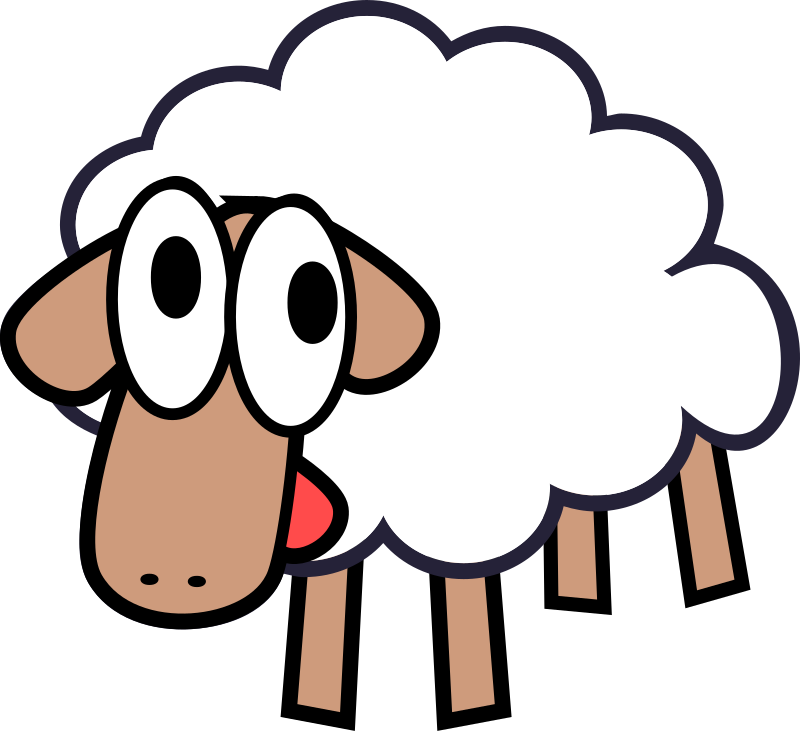

In [4]:
# 在线获取文件
response = get('http://labfile.oss.aliyuncs.com/courses/370/test.png').content
# 转换为内存文件
picture_file = BytesIO(response)
# 打开并显示图片
image = Image.open(picture_file)
display(image)

In [5]:
# 图像缩放
image = image.resize((80, 80), Image.NEAREST)
# 初始化输出字符串
text = ""
# 遍历图像每一行
for i in range(80):
    # 遍历图像每一列
    for j in range(80):
        # 将坐标值RGB转换为字符
        text += get_char(*image.getpixel((j, i)))
    # 结尾换行
    text += "\n"
# 打印到屏幕
print(text)

                                 *******                                        
                               ***********                                      
                              ***       ***                                     
                             **.          **   *******                          
                            **             *******b*****                        
                           #*               **;       j**$                      
                           **               c           **                      
                     ***** *                             **                     
                   *********                              **                    
                 ****      *                              **                    
                ***                                        *                    
               o*p                                         **                   
               **           